# Titanic task from https://www.kaggle.com/c/titanic

Anton Karazeev, 493, https://www.kaggle.com/akarazeev

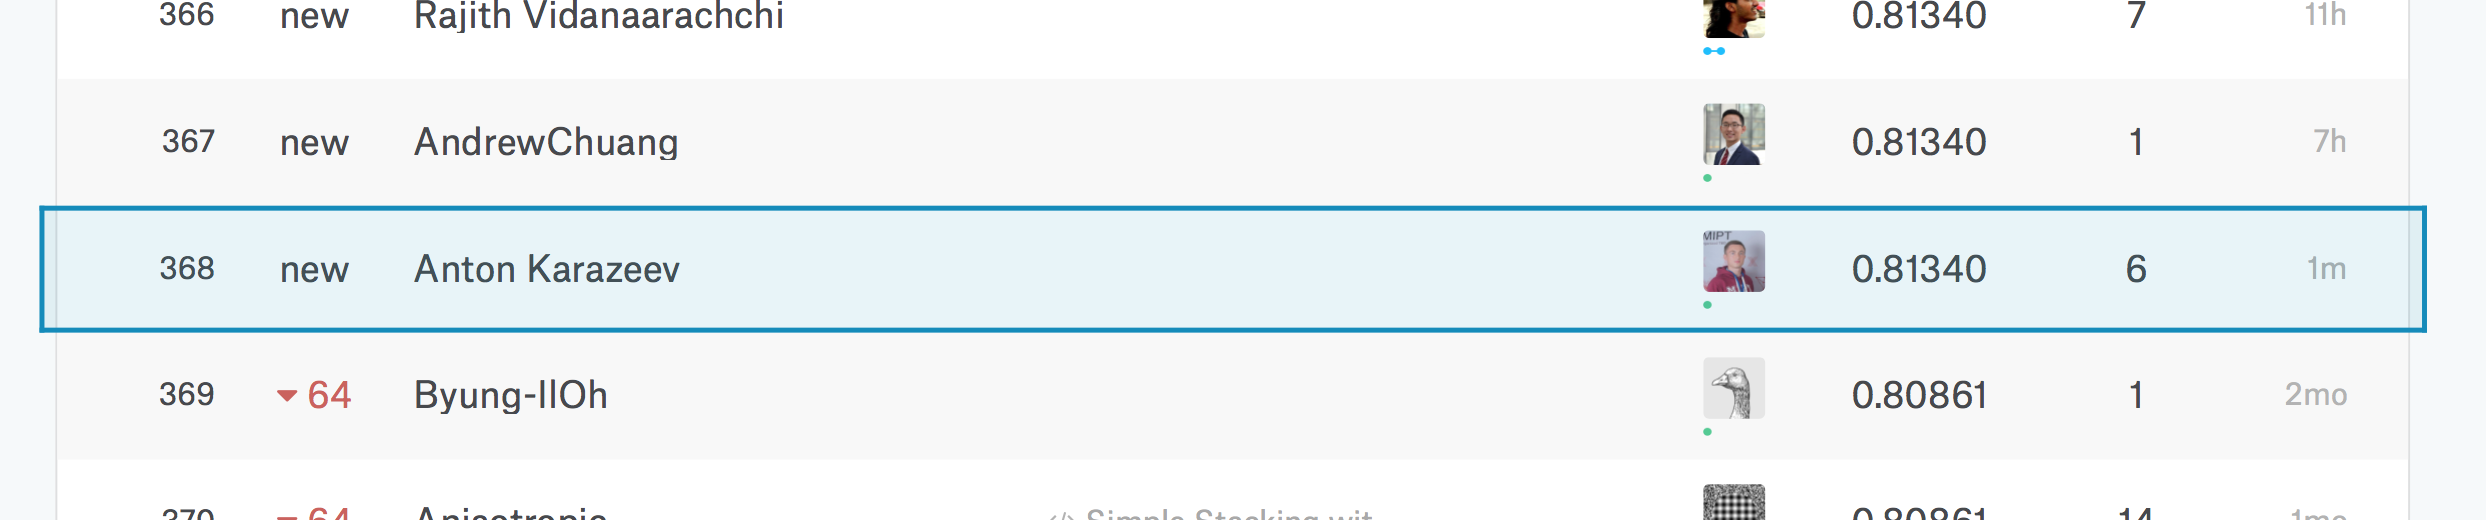

In [28]:
from IPython.display import Image

Image('kaggle_titanic.png')

In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
df_test = pd.DataFrame.from_csv('test.csv')
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df_train = pd.DataFrame.from_csv('train.csv')
y = df_train['Survived']
df_train = df_train.drop(['Survived'], axis=1)

df_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_concat = pd.concat([df_train, df_test])
df_concat.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
set(list(map(lambda x: x.lower().split()[1], df_concat['Name'].values)))

{'billiard,',
 'brito,',
 'capt.',
 'carlo,',
 'col.',
 'cruyssen,',
 'der',
 'don.',
 'dr.',
 'gordon,',
 'impe,',
 'jonkheer.',
 'khalil,',
 'major.',
 'master.',
 'melkebeke,',
 'messemaeker,',
 'miss.',
 'mlle.',
 'mme.',
 'mr.',
 'mrs.',
 'ms.',
 'mulder,',
 'palmquist,',
 'pelsmaeker,',
 'planke,',
 'rev.',
 'shawah,',
 'steen,',
 'the',
 'velde,',
 'walle,',
 'y'}

In [6]:
titles = [
 'capt.',
 'col.',
 'don.',
 'dr.',
 'major.',
 'master.',
 'miss.',
 'mlle.',
 'mme.',
 'mr.',
 'mrs.',
 'ms.',
 'rev.']

In [7]:
def get_title_ix(name):
    name = name.lower().split()
    for w in name:
        if w in titles:
            return 1 + titles.index(w)
    return 0

In [8]:
df_concat['Name'] = list(map(lambda x: get_title_ix(x), df_concat['Name']))
df_concat.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,10,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,11,female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,7,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,11,female,35.0,1,0,113803,53.1000,C123,S
5,3,10,male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
categorial = ['Name', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked', 'Fare']

df_factorized = df_concat.copy()

for cat in categorial:
    df_factorized[cat] = pd.factorize(df_concat[cat], na_sentinel=9999)[0]

In [10]:
df_factorized.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,0,0,0,1,0,0,0,9999,0
2,1,1,1,1,1,0,1,1,0,1
3,3,2,1,2,0,0,2,2,9999,0
4,1,1,1,3,1,0,3,3,1,0
5,3,0,0,3,0,0,4,4,9999,0


In [11]:
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values=9999, strategy='most_frequent')
df_imputed = pd.DataFrame(imp.fit_transform(df_factorized), columns=df_factorized.columns)
df_imputed.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,0.0
1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
2,3.0,2.0,1.0,2.0,0.0,0.0,2.0,2.0,7.0,0.0
3,1.0,1.0,1.0,3.0,1.0,0.0,3.0,3.0,1.0,0.0
4,3.0,0.0,0.0,3.0,0.0,0.0,4.0,4.0,7.0,0.0


In [12]:
filter(lambda x: x[1], [(col, df_imputed[col].isnull().any()) for col in df_imputed])

[]

In [13]:
categorial

['Name', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked', 'Fare']

In [14]:
df_train = df_imputed.ix[:len(y)-1]
df_test = df_imputed.ix[len(y):]
assert(len(df_test) + len(df_train) == len(df_imputed))

In [15]:
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
891,3.0,0.0,0.0,86.0,0.0,0.0,681.0,204.0,7.0,2.0
892,3.0,1.0,1.0,46.0,1.0,0.0,682.0,248.0,7.0,0.0
893,2.0,0.0,0.0,64.0,0.0,0.0,683.0,249.0,7.0,2.0
894,3.0,0.0,0.0,6.0,0.0,0.0,684.0,51.0,7.0,0.0
895,3.0,1.0,1.0,0.0,1.0,1.0,405.0,187.0,7.0,0.0


In [16]:
df_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,0.0
1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
2,3.0,2.0,1.0,2.0,0.0,0.0,2.0,2.0,7.0,0.0
3,1.0,1.0,1.0,3.0,1.0,0.0,3.0,3.0,1.0,0.0
4,3.0,0.0,0.0,3.0,0.0,0.0,4.0,4.0,7.0,0.0


In [17]:
# from sklearn.preprocessing import OneHotEncoder

# def get_encoded(df):
#     categorial_indices = map(lambda x: x in categorial, df.columns)
#     ohe = OneHotEncoder(categorical_features=categorial_indices)
#     ohe.fit(df)
#     return ohe.transform(df)
    
# df_encoded_train = get_encoded(df_train)
# df_encoded_test = get_encoded(df_test)

In [22]:
from sklearn.preprocessing import OneHotEncoder

categorial_indices = map(lambda x: x in categorial, df_imputed.columns)
ohe = OneHotEncoder(categorical_features=categorial_indices)
ohe.fit(df_imputed)
tmp = ohe.transform(df_imputed).toarray()

In [23]:
# split data after OHE to train and test

df_train = tmp[:len(y)]
df_test = tmp[len(y):]
assert(len(df_test) + len(df_train) == len(df_imputed))

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()

print "one-hot encoding: {0:.4f}".format(
    cross_val_score(lr, df_train, y, n_jobs=-1).mean())

one-hot encoding: 0.8406


In [27]:
lr.fit(df_train, y)
df_submission = pd.DataFrame({'PassengerId': np.arange(892, 1310), 
                              'Survived': lr.predict(df_test)})
df_submission.to_csv('submission.csv', index=False)


# # lr.fit(df_train, y)
# df_submission = pd.DataFrame({'PassengerId': np.array(df_test.index) + 1, 
#                               'Survived': lr.predict(df_test)})
# df_submission.to_csv('submission.csv', index=False)

In [18]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200, max_depth=100, n_jobs=-1)

print "one-hot encoding: {0:.4f}".format(
    cross_val_score(rfc, df_train, y, n_jobs=-1).mean())

NameError: name 'cross_val_score' is not defined

In [26]:
rfc.fit(df_train, y)
df_submission = pd.DataFrame({'PassengerId': np.arange(892, 1310), 
                              'Survived': rfc.predict(df_test)})
df_submission.to_csv('submission.csv', index=False)

# rfc.fit(df_train, y)
# df_submission = pd.DataFrame({'PassengerId': np.array(df_test.index) + 1, 
#                               'Survived': rfc.predict(df_test)})
# df_submission.to_csv('submission.csv', index=False)